In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as pl
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set()

ModuleNotFoundError: No module named 'statsmodels'

In [80]:
raw_data = pd.read_csv('..\Data\Time Series Analysis in Python\Section 3\S_3_L_11\Index2018.csv')
df = raw_data.copy()

In [81]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [82]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


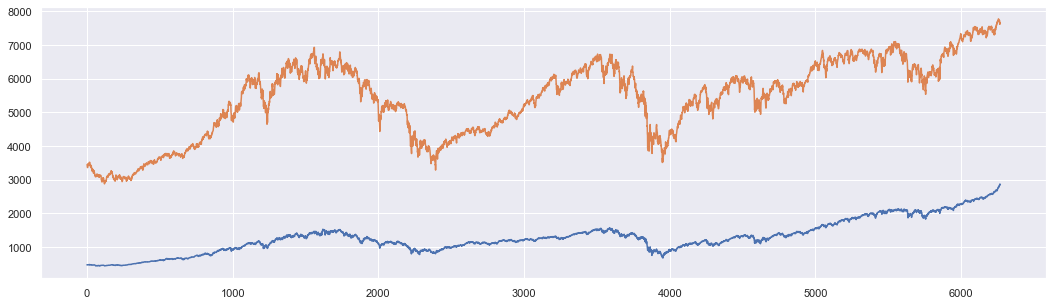

In [83]:
df.spx.plot(figsize=(18,5))
df.ftse.plot(figsize=(18,5))
plt.show()

#### QQ PLot

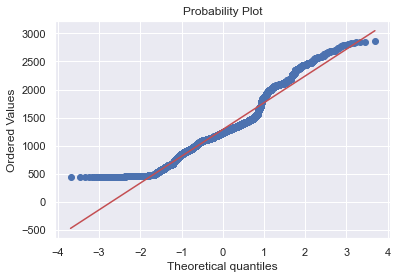

In [84]:
# In this case the data is not normally distributed
stats.probplot(df.spx, dist="norm", plot=pl)
pl.show()

In [85]:
df.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [86]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')

In [87]:
df.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [88]:
df.set_index('date', inplace=True)

In [89]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [90]:
 df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [91]:
df = df.asfreq('B')

In [92]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [93]:
df.spx.fillna(method='ffill', inplace=True)
df.dax.fillna(value=df.dax.mean(), inplace=True)
df.ftse.fillna(method='bfill', inplace=True)

In [94]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [95]:
df['Market_Value'] = df.spx
df.Market_Value

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2018-01-23    2839.130362
2018-01-24    2837.544008
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-29    2853.528411
Freq: B, Name: Market_Value, Length: 6277, dtype: float64

In [96]:
size = int(len(df.Market_Value) * 0.8)

In [97]:
data = pd.DataFrame(df.Market_Value.iloc[:size])
data_test = pd.DataFrame(df.Market_Value.iloc[size:])

In [98]:
data

,Market_Value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


#### White Noise

In [99]:
wn = np.random.normal(data.mean(), data.std(), size=len(data))

In [100]:
data['wn'] = wn

In [101]:
data.describe()

,Market_Value,wn
count,5021.000000,5021.000000
mean,1091.651926,1099.309485
std,292.559287,290.423153
min,438.920000,25.448934
25%,914.620000,904.896578
50%,1144.650000,1103.615155
75%,1316.280729,1290.456771
max,1570.252238,2129.175265


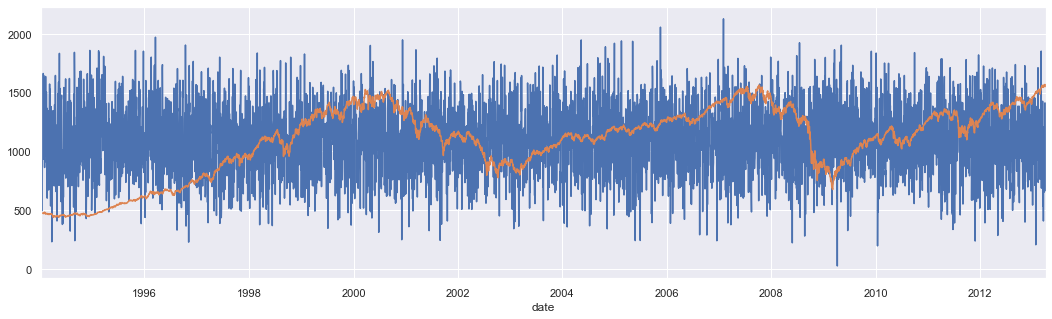

In [102]:
data.wn.plot(figsize=(18,5))
data.Market_Value.plot(figsize=(18,5))
plt.show()

In [103]:
rw = pd.read_csv('..\Data\Time Series Analysis in Python\RandWalk.csv')
rw.date = pd.to_datetime(rw.date, format='%d/%m/%Y')
rw.set_index('date', inplace=True)
rw = rw.asfreq('B')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [104]:
data['rw'] = rw.price

In [105]:
data

,Market_Value,wn,rw
date,,,
1994-01-07,469.900000,1423.559287,1122.139662
1994-01-10,475.270000,1377.395541,1080.347860
1994-01-11,474.130000,1410.687849,1082.095245
1994-01-12,474.170000,1527.588480,1083.639265
1994-01-13,472.470000,495.851857,1067.146255
...,...,...,...
2013-04-01,1562.173837,712.864034,2263.675474
2013-04-02,1570.252238,1413.794177,2225.000870
2013-04-03,1553.686978,1392.091728,2190.787688


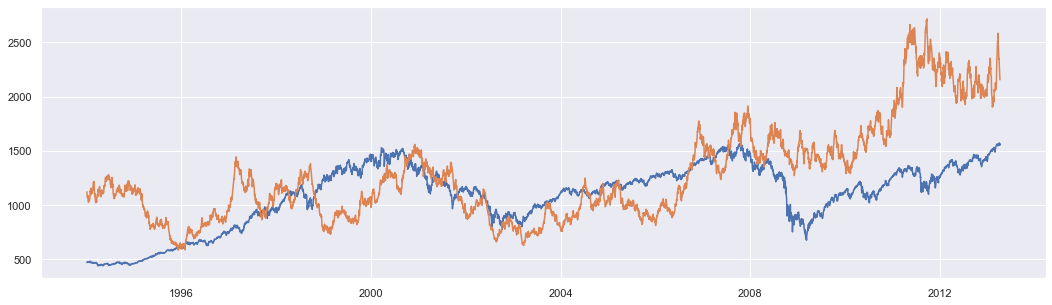

In [107]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(data.index, data.Market_Value, label='Market Value')
ax.plot(data.index, data.rw, label='wn');

AttributeError: module 'scipy.stats' has no attribute 'adfuller'